# Stiff Differential Equation

Oleh:<br>
1. Winardi Cakra(1901483401)
2. William (1901460373)
3. Salsabila Malik(1901471010)
4. Jeremy Dumalang(1901480766)

Pada *Jupyter notebook* ini akan diselesaikan *Stiff Differential Problem* dengan menggunakan *Implicit Euler Method* sebagai berikut

$$
y_{i+1}= y_i+ \frac{dy_{i+1}}{dt}\cdot h
$$
dengan diketahui nilai awal $y(0)= C$ dan persamaan diferensial $\displaystyle \frac{dy}{dt}= -ay$


Contoh soal:
Diketahui persamaan diferensial sebagai berikut $\displaystyle \frac{dy}{dt}=-1000y+3000-2000e^{-t}$ dengan $y(0)=0$, $t\in[0,1]$

Untuk soal ini, kita sudah mengetahui *exact solution*-nya. Tujuannya adalah agar kita mengetahui *error* dari metode ini.

*Exact solution*-nya adalah

$$
y = 3-0.998 \cdot e^{-1000t} - 2.002 \cdot e^{-t}
$$

Di mana representasi dari fungsi tersebut di dalam Python adalah sebagai berikut.

In [1]:
import numpy as np

def yeksak(t):
    return 3-0.998*np.exp(-1000*t)-2.002*np.exp(-t)


Pertama, persoalan di atas dapat diubah ke dalam bentuk eksplisit sebagai berikut:
$$
y_{i+1}= y_i+ (-1000y_{i+1}+3000-2000e^{-t_{i+1}}) \cdot h
$$
$$
1000y_{i+1} \cdot h + y_{i+1}=y_i + (3000-2000e^{-t_{i+1}}) \cdot h
$$
$$
y_{i+1}(1000h + 1)=y_i + (3000-2000e^{-t_{i+1}}) \cdot h
$$
$$
y_{i+1} = \frac{y_i + (3000-2000e^{-t_{i+1}}) \cdot h}{(1000h + 1)} 
$$

Lalu, persoalan di atas kita akan selesaikan dengan beberapa nilai $h$.

Pertama, kita akan pilih $h=0.25$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Implicit_Euler(a,b,h):
    n = int((b-a)/h)

    y = np.zeros(n+1)
    t = np.zeros(n+1)

    for i in range(n):
        t[i+1] = t[i]+h


    for i in range(n):
        y[i+1] = (y[i]+3000*h-2000*h*np.exp(-t[i+1]))/(1000*h+1)

    return(n,t,y)
    
n,t,y= Implicit_Euler(0,1,0.25)

print (t)
print (y)

[0.   0.25 0.5  0.75 1.  ]
[0.         1.43665183 1.78554312 2.0541923  2.26340427]


Lalu, kita bandingkan *error* dari metode kita terhadap *exact solution*.

Error: 0.13621046729405892 %


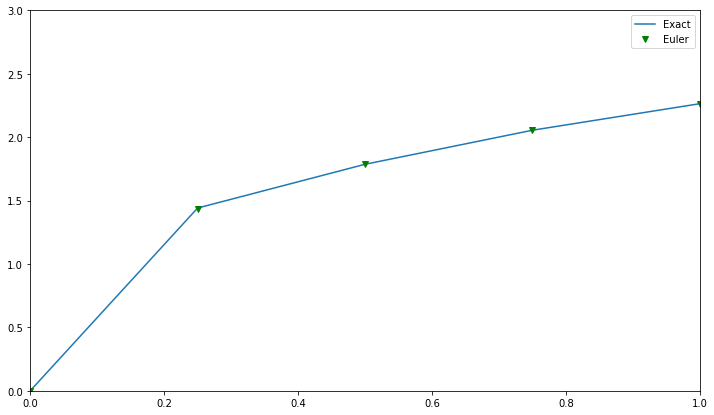

In [3]:
def calc_error(f,t):
    yeks = np.zeros(n+1)
    for i in range(n):
        yeks[i] = f(t[i])
    
    ytemp = np.zeros(n+1)
    for i in range(n):
        ytemp[i] = y[i]-yeks[i]
        
    return np.linalg.norm(ytemp)/np.linalg.norm(yeks)*100


print ('Error:', calc_error(yeksak,t), '%')


def plot(t,y, yeksak):
    plt.figure(figsize=(12,7))
    plot_range = t
    plt.axis([0,1,0,3])
    plt.plot(plot_range, yeksak(plot_range),label='Exact')
    plt.plot(plot_range,y, 'v',color='green', label='Euler')
    plt.legend()
    plt.show()

plot(t,y,yeksak)

Kedua, kita pilih $h=0.2$

In [4]:
n,t,y=Implicit_Euler(0,1,0.2)
print(t)
print (y)

[0.  0.2 0.4 0.6 0.8 1. ]
[0.         1.3557597  1.65784946 1.90116017 2.10034614 2.26342572]


Error: 0.14482466105404027 %


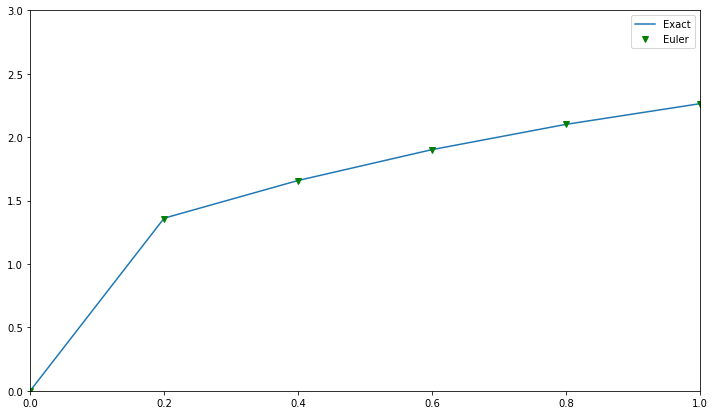

In [5]:
error= np.zeros(n+1)
print('Error:',calc_error(yeksak,t), '%')
plot(t,y,yeksak)

Terakhir, kita pilih $h=0.1$

In [6]:
n,t,y= Implicit_Euler(0,1,0.1)
print(t)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.         1.17853977 1.36071672 1.5168027  1.65794845 1.78566155
 1.90122113 2.00578377 2.10039595 2.18600459 2.2634665 ]


Error: 0.18747069692549884 %


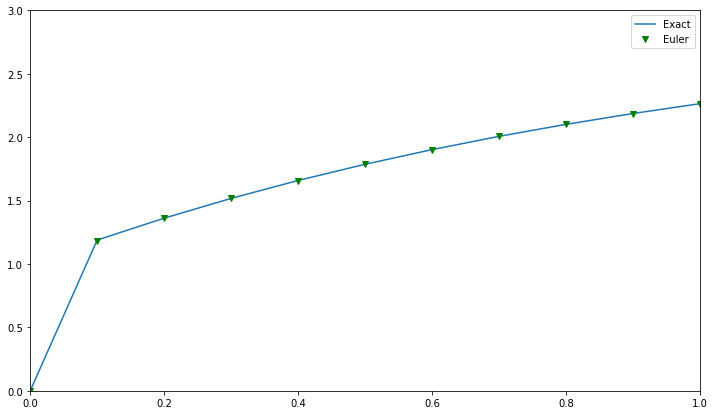

In [7]:
error= np.zeros(n+1)
print('Error:',calc_error(yeksak,t), '%')
plot(t,y,yeksak)

Jadi, dari jika kita lihat dari *error* yang ada, semakin kecil $h$ yang kita pilih maka *error* nya akan semakin kecil maka metode yang ada semakin akurat.